In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
page = urlopen(url)

In [4]:
html = soup(page, 'lxml')

In [5]:
rows = html.find_all("tr")

In [6]:
list_rows = []
for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td)
    cleanedText = soup(str_cells, 'lxml').get_text()
    list_rows.append(cleanedText)

In [7]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."
5,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
6,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3..."
7,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:..."
8,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00..."
9,"[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39..."


In [8]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [9]:
df1[0] = df1[0].str.strip('[') # rm opening brackets from col 0
df1[13] = df1[13].str.strip(']') # remove closing bracket from col 13
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,


In [10]:
# add table headers
th = html.find_all('th')

headers = []
"""
cleanedHeader = soup(str(th), 'lxml').get_text()
headers.append(cleanedHeader)
"""
for header in th:
    cleanedHeader = soup(str(header), 'lxml').get_text()
    headers.append(cleanedHeader)

df1.columns = headers
df1.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,


In [11]:
# second way to do above cell
"""
headers2 = []
cleanedHeader = soup(str(th), 'lxml').get_text()
headers2.append(cleanedHeader)
df2 = pd.DataFrame(headers2)
df3 = df2[0].str.split(',', expand=True)
frames = [df3, df0]
# merge two data frames
df4 = pd.concat(frames)
# make first row the column headers
df5 = df4.rename(columns=df4.iloc[0])
df5.head()
"""

"\nheaders2 = []\ncleanedHeader = soup(str(th), 'lxml').get_text()\nheaders2.append(cleanedHeader)\ndf2 = pd.DataFrame(headers2)\ndf3 = df2[0].str.split(',', expand=True)\nframes = [df3, df0]\n# merge two data frames\ndf4 = pd.concat(frames)\n# make first row the column headers\ndf5 = df4.rename(columns=df4.iloc[0])\ndf5.head()\n"

In [12]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 14 columns):
Place              596 non-null object
Bib                595 non-null object
Name               592 non-null object
Gender             592 non-null object
City               592 non-null object
State              592 non-null object
Chip Time          592 non-null object
Chip Pace          577 non-null object
Gender Place       577 non-null object
Age Group          577 non-null object
Age Group Place    577 non-null object
Time to Start      577 non-null object
Gun Time           577 non-null object
Team               577 non-null object
dtypes: object(14)
memory usage: 65.3+ KB


(596, 14)

In [13]:
df2 = df1.dropna(axis=0, how='any') # drop rows with missing values
df2.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,
10,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,00:40:04,06:27,7 of 414,M 36-45,3 of 152,00:00:13,00:40:17,
11,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,00:40:05,06:27,8 of 414,M 36-45,4 of 152,00:00:04,00:40:09,
12,9,7,BRANDON THOMAS,M,,,00:40:17,06:29,9 of 414,M 26-35,3 of 154,00:00:07,00:40:24,COLUMBIA TEAM B
13,10,3,ERIK BJORNSTAD,M,,,00:40:21,06:30,10 of 414,M 36-45,5 of 152,00:00:04,00:40:25,COLUMBIA TEAM A


In [18]:
# Data analysis

# Converting Time from HH:MM::SS to mins

time_list = df2['Chip Time'].tolist()

time_mins = []
for i in time_list:
    h, m , s = i.split(':')
    total = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(total)
    
#print(time_mins[:10])

# Add col Runner mins to data frame

df2['Runner Mins'] = time_mins

df2.head()


/Users/Vineeth/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner Mins
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


In [19]:
df2.describe(include=[np.number])

,Runner Mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [20]:
# Visualizations

([<matplotlib.axis.XTick at 0x11dfa1c18>],
 <a list of 1 Text xticklabel objects>)

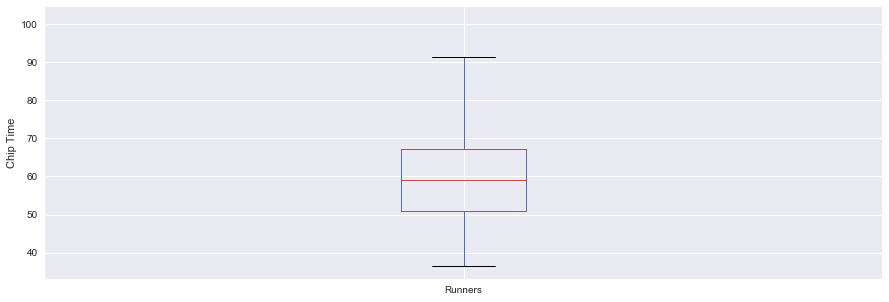

In [21]:
# Box plot
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
df2.boxplot(column='Runner Mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

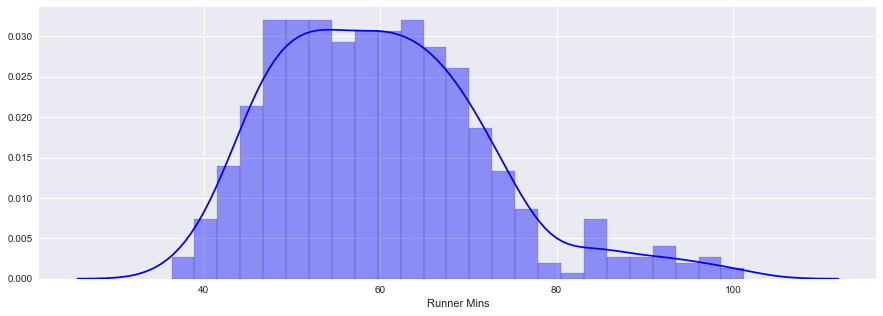

In [25]:
# Distribution graph
x = df2['Runner Mins']
sns.distplot(x, hist=True, kde=True, rug=False, color='b', bins=25, hist_kws={'edgecolor': 'black'})
plt.show()

/Users/Vineeth/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:192: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/Vineeth/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

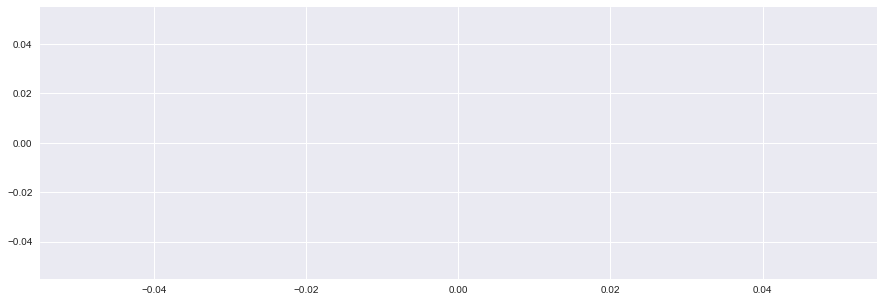

In [39]:
# Distribution by gender
f = df2.loc[df2['Gender'] == 'F']['Runner Mins']
m = df2.loc[df2['Gender'] == 'M']['Runner Mins']
sns.distplot(f, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [42]:
gender_stats = df2.groupby("Gender", as_index=True).describe()
print(gender_stats)

       Runner Mins                                                         \
             count       mean        std        min        25%        50%   
Gender                                                                      
 F           163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M           414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
 F      72.058333  101.300000  
 M      64.804167   98.516667  
